In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from scipy.stats import spearmanr
from collections import defaultdict


In [2]:
aps_fmt = lambda x: f'data/aps_{x}_2.npz'
cic_fmt = lambda x: f'data/cic_{x}.npz'
gcrl_fmt = lambda x: f'data/gcrl_{x}.npz'
rnd_fmt = lambda x: f'data/vrnd_{x}.npz'
rand_fmt = lambda x: f'data/random_{x}.npz'
fmts = {'aps': aps_fmt, 'cic': cic_fmt, 'gcrl': gcrl_fmt, 'rnd': rnd_fmt, 'rand': rand_fmt}

envs = ['button_press', 'door_open', 'drawer_close', 'drawer_open', 'peg_insert_side', 'pick_place', 'push', 'reach', 'window_close', 'window_open']
envs_short = ['button_press', 'pick_place', 'reach', 'window_open']

In [3]:
all_data = {env: {k: np.load(f(env), allow_pickle=True) for k, f in fmts.items()} for env in envs}

In [6]:
def features(data):
    r_sorted = np.sort(data['reward'][:, 0])
    state_traj = data['state'].reshape((2000, 500, 39))
    start_pos = state_traj[:, [0], :3] # (2000, 1, 3)
    goal = state_traj[:, :, -3:]
    dists_start_pos = np.sqrt(((state_traj[:, :, :3] - start_pos)**2).sum(axis=-1))
    dists_goal = np.sqrt(((state_traj[:, :, :3] - goal)**2).sum(axis=-1))
    action_mag = np.sqrt((data['action']**2).sum(axis=-1))
    return {
        'reward_max': r_sorted[-1],
        'reward_mean': r_sorted.mean(),
        'reward_std': r_sorted.std(),
        'reward_75': r_sorted[int(.75*len(r_sorted))],
        'reward_90': r_sorted[int(.9*len(r_sorted))],
        'dist_from_start_mean': dists_start_pos.mean(),
        'dist_from_start_std': dists_start_pos.std(),
        'dist_from_goal_mean': dists_goal.mean(),
        'dist_from_goal_std': dists_goal.std(),
        'action_mag_mean': action_mag.mean(),
        'action_mag_std': action_mag.std(),
    }

In [8]:
all_feats = {}
for env in envs:
    print(env)
    env_feats = {}
    for k in fmts:
        print(k)
        env_feats[k] = features(all_data[env][k])
    all_feats[env] = env_feats

button_press
aps
cic
gcrl
rnd
rand
door_open
aps
cic
gcrl
rnd
rand
drawer_close
aps
cic
gcrl
rnd
rand
drawer_open
aps
cic
gcrl
rnd
rand
peg_insert_side
aps
cic
gcrl
rnd
rand
pick_place
aps
cic
gcrl
rnd
rand
push
aps
cic
gcrl
rnd
rand
reach
aps
cic
gcrl
rnd
rand
window_close
aps
cic
gcrl
rnd
rand
window_open
aps
cic
gcrl
rnd
rand


In [9]:
success_rates = yaml.safe_load(open('results.yaml'))

In [10]:
feat_preds = defaultdict(list)
for env in envs:
    for fmt in fmts:
        for feat in all_feats[env][fmt]:
            if type(feat) == np.ndarray:
                feat_preds[feat].append(all_feats[env][fmt][feat][0])
            else:
                feat_preds[feat].append(all_feats[env][fmt][feat])

labels = []
for env in envs:
    for fmt in fmts:
        labels.append(success_rates['unsup'][env][fmt])

feat_spearmans_unsup = {k: spearmanr(feat_preds[k], labels).statistic for k in feat_preds}
feat_spearmans_unsup

{'reward_max': 0.612672955539679,
 'reward_mean': 0.7831987848345197,
 'reward_std': 0.7783278427060633,
 'reward_75': 0.5823698408782585,
 'reward_90': 0.8002905018048526,
 'dist_from_start_mean': 0.06678061658113854,
 'dist_from_start_std': 0.15898755107281995,
 'dist_from_goal_mean': -0.09347337944508012,
 'dist_from_goal_std': -0.11549003786570347,
 'action_mag_mean': 0.03984430661077412,
 'action_mag_std': -0.09035597648286797}

In [11]:
feat_preds = defaultdict(list)
for env in envs_short:
    for fmt in fmts:
        for feat in all_feats[env][fmt]:
            if type(feat) == np.ndarray:
                feat_preds[feat].append(all_feats[env][fmt][feat][0])
            else:
                feat_preds[feat].append(all_feats[env][fmt][feat])

labels = []
for env in envs_short:
    for fmt in fmts:
        labels.append(success_rates['5_shot'][env][fmt])

feat_spearmans_5_shot = {k: spearmanr(feat_preds[k], labels).statistic for k in feat_preds}
feat_spearmans_5_shot

{'reward_max': 0.7897217706116398,
 'reward_mean': 0.7078135509603934,
 'reward_std': 0.8463481817900746,
 'reward_75': 0.7017573922355985,
 'reward_90': 0.8554324198772669,
 'dist_from_start_mean': 0.09538449991551824,
 'dist_from_start_std': 0.16048820620706244,
 'dist_from_goal_mean': -0.08100112294413057,
 'dist_from_goal_std': 0.05753350788555069,
 'action_mag_mean': 0.05223436900135524,
 'action_mag_std': -0.17638562285964884}

In [12]:
feat_preds = defaultdict(list)
for env in envs_short:
    for fmt in fmts:
        for feat in all_feats[env][fmt]:
            if type(feat) == np.ndarray:
                feat_preds[feat].append(all_feats[env][fmt][feat][0])
            else:
                feat_preds[feat].append(all_feats[env][fmt][feat])

labels = []
for env in envs_short:
    for fmt in fmts:
        labels.append(success_rates['10_shot'][env][fmt])

feat_spearmans_10_shot = {k: spearmanr(feat_preds[k], labels).statistic for k in feat_preds}
feat_spearmans_10_shot

{'reward_max': 0.7668962071120251,
 'reward_mean': 0.7505773996060122,
 'reward_std': 0.8639576714498208,
 'reward_75': 0.7415069778585076,
 'reward_90': 0.8805867779869126,
 'dist_from_start_mean': 0.0226760543687617,
 'dist_from_start_std': 0.0740751109379549,
 'dist_from_goal_mean': -0.13076524685985913,
 'dist_from_goal_std': 0.06576055766940893,
 'action_mag_mean': 0.08919248051712934,
 'action_mag_std': -0.16931453928675402}

In [13]:
feat_order = ['reward_max', 'reward_mean', 'reward_std', 'reward_75', 'reward_90', 'dist_from_start_mean', 'dist_from_start_std',   'dist_from_goal_mean', 'dist_from_goal_std', 'action_mag_mean', 'action_mag_std']
results_arr = np.array([
    [feat_spearmans_unsup[k] for k in feat_order],
    [feat_spearmans_5_shot[k] for k in feat_order],
    [feat_spearmans_10_shot[k] for k in feat_order],
])

Text(0.5, 1.0, 'Spearman Corrleation Between Dataset Features and Downstream Success Rate')

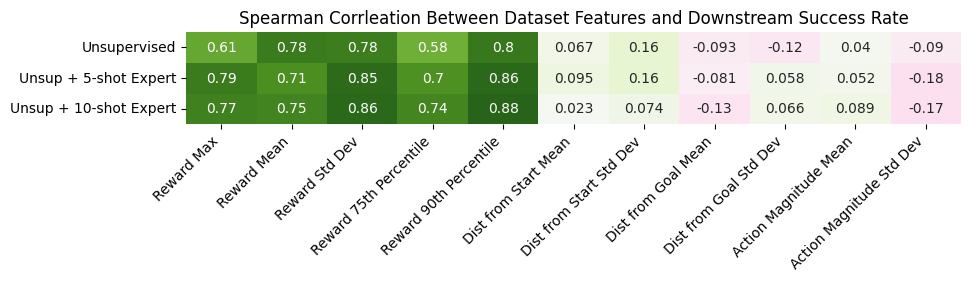

In [14]:
feat_names = ['Reward Max', 'Reward Mean', 'Reward Std Dev', 'Reward 75th Percentile', 'Reward 90th Percentile', 'Dist from Start Mean',
              'Dist from Start Std Dev', 'Dist from Goal Mean', 'Dist from Goal Std Dev', 'Action Magnitude Mean', 'Action Magnitude Std Dev']
modes = ['Unsupervised', 'Unsup + 5-shot Expert', 'Unsup + 10-shot Expert']
plt.figure(figsize=(10, 1.2))
sns.heatmap(results_arr, xticklabels=feat_names, yticklabels=modes, annot=True, cmap='PiYG', center=0, cbar=False)
plt.xticks(rotation=45, ha='right')
plt.title('Spearman Corrleation Between Dataset Features and Downstream Success Rate')